In [84]:
# Workflow
list = {1:"Load data as tensor", 2:"Make a model", 3
        :"Train the model with the data", 
        4:"make prediction and evaluate the model(inference)", 
        5: "Save it and loading a model", 6: "Put all together"}

for it, info in list.items():
    print(it, info)


1 Load data as tensor
2 Make a model
3 Train the model with the data
4 make prediction and evaluate the model(inference)
5 Save it and loading a model
6 Put all together


In [85]:
import torch
from torch import nn # pytroch building blocks for neural network
import matplotlib.pyplot as plt
import numpy as np

In [86]:
# Data processing

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

# Artifical data
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X+bias

# Machine Learning is the process to try to match the input with output

In [87]:
# Split data to train and test
split_index = int(len(X)*0.8)
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

Text(0, 0.5, 'y values')

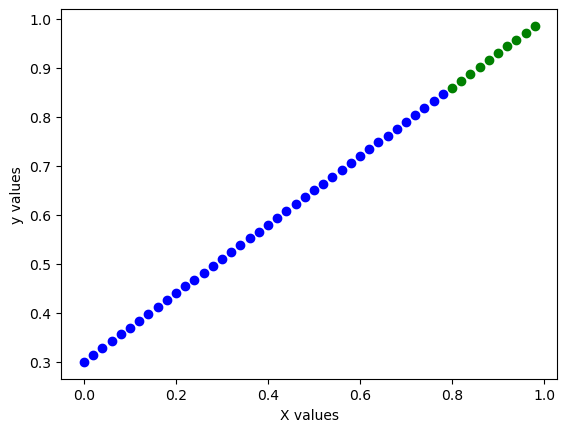

In [88]:
# Visualize the data
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Train data')
plt.xlabel('X values')
plt.ylabel('y values')

In [89]:
'''
    Model is designated to find weight and bias

    Ways to find (get close to) the true values:
        1. Gradient descent
        2. Backpropagation

'''

'\n    Model is designated to find weight and bias\n\n    Ways to find (get close to) the true values:\n        1. Gradient descent\n        2. Backpropagation\n\n'

In [90]:
# Linear Regression Function to find the weight and bias

from torch import nn

class LinearRegressionFunc(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Initialize random values for weight
        self.weight = nn.Parameter(torch.randn(1,
                                               requires_grad=True, 
                                               dtype=torch.float
                                               ))
        
        # Create initial random values for bias
        self.bias = nn.Parameter(torch.randn(1,
                                               requires_grad=True, 
                                               dtype=torch.float
                                               ))
        
    # Calculate result using weight and bias values
    def forward(self, X: torch.tensor) -> torch.tensor:
        return self.weight * X + self.bias   # Define the forward computation, in this case is linear regression
    
class LinearRegressionFunc_using_nn_bulit_in(nn.Module):
    def __init__(self):
        super().__init__()

        # use nn.Linear() to create model parameters weight and bias
        self.linear_layer = nn.Linear(in_features=1, out_features=1) # This indicated the fucntion is taking only one input and giving only one output

    def forward(self, X: torch.tensor) -> torch.tensor:
        return 

In [91]:
# Random seed
torch.manual_seed(100)
# Create instance of the model
model = LinearRegressionFunc()

In [92]:
with torch.inference_mode():
    y_prediction_example = model(X_test)

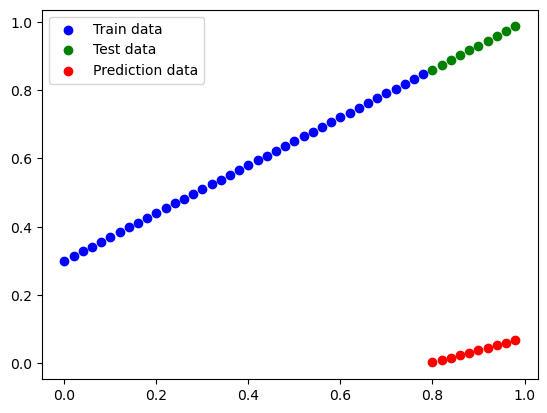

In [93]:
plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.scatter(X_test, y_prediction_example, color='red', label='Prediction data')
plt.legend()

In [94]:
# Train the model to improve performance:

    # Loss function: How wrong the model is compared to the expacted output, lower is better
    # Optimizer: Take into account of the loss and adjust the parameters in the model

    # Necessary actions for PyTorch: 
        # Training loop
        # Testing loop

In [95]:
loss_function = torch.nn.L1Loss() # Mean absolute error

# torch.optim, contains a lot of optimizer fuctions
# SDG (stochastic gradient descent, aka random gradient descent)
optimizer = torch.optim.SGD (params=model.parameters(),
                             lr=0.001,  # lr = learning rate, most important hyperparameter
                             )


In [96]:
'''

Steps in a training loop
    1. Loop through the data
    2. Forward pass / Forward propagation using the forward() fuction
    3. Calculate loss using loss_fuction
    4. Optimizer zero grad
    5. Loss backward (backpropagation): move backwards through the network 
       to calculate the gradients of each parameters in the model with respect to the loss
    6. Optimizer step (gradient descent): use the optimizer to adjudt the model parameters for lower loss
    
'''

'\n\nSteps in a training loop\n    1. Loop through the data\n    2. Forward pass / Forward propagation using the forward() fuction\n    3. Calculate loss using loss_fuction\n    4. Optimizer zero grad\n    5. Loss backward (backpropagation): move backwards through the network \n       to calculate the gradients of each parameters in the model with respect to the loss\n    6. Optimizer step (gradient descent): use the optimizer to adjudt the model parameters for lower loss\n    \n'

In [97]:
epoches = 2000

epoches_count = []
train_loss_count = []
test_loss_count = []

for epoch in range(epoches): # Step 1, loop the data

    # Set model to traning mode
    model.train()

    # Step 2, pass the data forward
    train_prediction = model(X_train)

    # Step 3, calculate loss
    train_loss = loss_function(train_prediction, y_train)   # loss_function takes in (input, target)

    # Step 4, optimizer zero grad
    optimizer.zero_grad()

    # Step 5, Perform backpropagation, calculate gradients
    train_loss.backward()

    # Step 6, use the optimizer to adjust the parameters
    optimizer.step() # By default, parameter values the optimizer changed will accumulate
                     # Thats why Step 3 is needed to zero out the changes made for next epoch

#***************************************************************************************************

    test_prediction = model(X_test)
    test_loss = loss_function(test_prediction, y_test)

    epoches_count.append(epoch)
    train_loss_count.append(train_loss)
    test_loss_count.append(test_loss)

    if epoch%50 ==0:
        print(f"Epoch: {epoch}, train loss: {train_loss}, test loss: {test_loss}")
        print(model.state_dict())
        print()


Epoch: 0, train loss: 0.7182652950286865, test loss: 0.8865903615951538
OrderedDict([('weight', tensor([0.3610])), ('bias', tensor([-0.2849]))])

Epoch: 50, train loss: 0.660660982131958, test loss: 0.8192359805107117
OrderedDict([('weight', tensor([0.3805])), ('bias', tensor([-0.2349]))])

Epoch: 100, train loss: 0.6030559539794922, test loss: 0.7518813014030457
OrderedDict([('weight', tensor([0.4000])), ('bias', tensor([-0.1849]))])

Epoch: 150, train loss: 0.5454509854316711, test loss: 0.6845265030860901
OrderedDict([('weight', tensor([0.4195])), ('bias', tensor([-0.1349]))])

Epoch: 200, train loss: 0.4878459870815277, test loss: 0.6171716451644897
OrderedDict([('weight', tensor([0.4390])), ('bias', tensor([-0.0849]))])

Epoch: 250, train loss: 0.4302411675453186, test loss: 0.5498169660568237
OrderedDict([('weight', tensor([0.4585])), ('bias', tensor([-0.0349]))])

Epoch: 300, train loss: 0.37263625860214233, test loss: 0.4824622571468353
OrderedDict([('weight', tensor([0.4780]))

In [98]:
# Model testing

# set model to testing mode
model.eval()

# turn more things off for tesing
with torch.inference_mode():
    final_test_prediction = model(X_test)

    final_test_loss = loss_function(test_prediction, y_test)

    print(f"Test loss: {final_test_loss}")


Test loss: 0.00023839474306441844


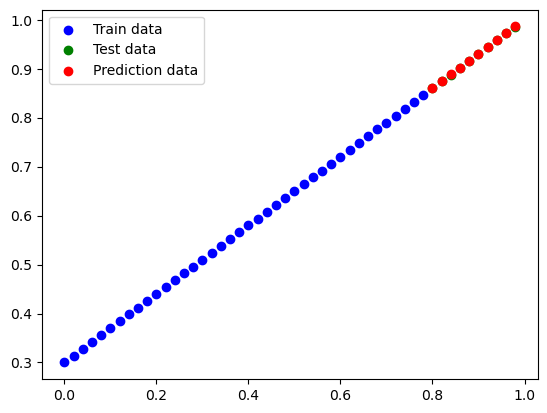

In [99]:
with torch.inference_mode():    
    plot = model(X_test)

plt.scatter(X_train, y_train, color='blue', label='Train data')
plt.scatter(X_test, y_test, color='green', label='Test data')
plt.scatter(X_test, plot, color='red', label='Prediction data')
plt.legend()

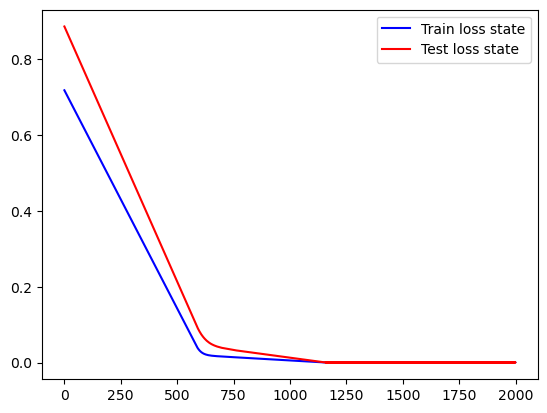

In [100]:
train_loss_count = torch.tensor(train_loss_count)
train_loss_count = np.array(train_loss_count)

test_loss_count = torch.tensor(test_loss_count)
test_loss_count = np.array(test_loss_count)

plt.plot(epoches_count, train_loss_count, color="blue", label="Train loss state")
plt.plot(epoches_count, test_loss_count, color="red", label="Test loss state")
plt.legend()

In [101]:
# Save the model
torch.save(model, "../PyTorch/saved_model.pth")

# Load the saved model
new_model = torch.load("../PyTorch/saved_model.pth")
new_model.state_dict()

OrderedDict([('weight', tensor([0.6996])), ('bias', tensor([0.3006]))])